# 连续变量预测：线性回归

**回归**（**regression**）是统计学中最常用的**拟合**（**fitting**）和**预测**（**predicting**）方法。针对不同的数据通常有不同的回归方法，比如针对连续变量预测的线性回归、分位数回归，以及针对离散变量的Logistic回归等。

通常回归方法对特征的函数假定非常强烈，因而在以上**参数**（**parametric**）回归基础上，还有对函数形式假设更加宽松的**非参数**（**nonparametric**）回归。

这里我们首先介绍参数回归中最简单的一个类型：针对连续的预测目标（被解释变量）的线性回归。

## 线性回归

针对连续的预测目标，最常用、最简单的方法是使用普通线性回归。

我们不不妨先从总体的角度考虑预测问题。如果我们有连续变量$y$以及一些特征$x$，我们的目的是使用特征$x$对$y$进行预测，意味着我们需要使用特征$x$的一个函数：$h\left(x\right)$对$y$进行预测，那么预测误差为：$$y-h\left(x\right)$$误差必然越‘小’越好，但是有两个困难阻碍了我们定义‘小’：

* 误差可正可负
* 误差是随机的

为了克服以上第一个困难，我们可以把误差求平方，从而误差的平方都为正数，且只有当误差为0时，误差的平方也为0，达到了完美预测，因而预测误差的平方应该是越小越好。

为了克服第二个困难，我们可以对误差平方求期望。如此，就诞生了**均方误差**（**mean squared error，MSE**）：$$\mathbb{E}\left[\left(y-h\left(x\right)\right)^{2}\right]$$均方误差越小说明预测误差越小，当均方误差为0时，模型达到了完全拟合。当然完全拟合或者完美预测在现实中是不可能达到的，所以均方误差总是大于0的。

如果一个函数$h^*\left(x\right)$能够使得以上均方误差最小：$$h^*\left(x\right)=\arg\min_{h\in\mathbb{H}}\left\{ \mathbb{E}\left[\left(y-h\left(x\right)\right)^{2}\right]\right\} $$那么我们称$h^*\left(x\right)$为$y$给定$x$的**条件期望**（**conditional expectation**），并记为：$\mathbb{E}\left(y|x\right)$。

然而$h\left(x\right)$的可能性太多，为了简化问题，我们必须对$h\left(x\right)$做一定的假设。其中最强的一个假设是假设$h\left(x\right)$为$x$的线性函数，即：$$h\left(x\right)=\beta_1\times x_1+\beta_2\times x_2+...+\beta_K\times x_K=x'\beta$$其中$$x=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{K}
\end{array}\right],\beta=\left[\begin{array}{c}
\beta_{1}\\
\beta_{2}\\
\vdots\\
\beta_{K}
\end{array}\right]$$不是一般性，我们通常会假设第一个变量$x_1=1$，从而$\beta_1$为**常数项**（**constant term**）。如此，我们将寻找函数$h^*\left(x\right)$的问题转换为了寻找参数$\beta_0$的问题：$$\mathbb{E}\left(y|x\right)=x'\beta_{0}=\arg\min_{\beta}\left\{ \mathbb{E}\left[\left(y-x'\beta\right)^{2}\right]\right\} $$只要$\beta_0$确定了，那么$h^*\left(x\right)$就确定了。

以上是总体层面的讨论。如果考虑样本层面，我们需要使用数据对$\beta_0$进行估计，那么我们可以将以上的期望符号换位平均符号，即：$$\hat{\beta}=\arg\min_{\beta}\frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}$$以上即经典的**普通最小二乘法**（**ordinary least squares**）。如果我们记：$$Y=\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{array}\right],X=\left[x_{1},x_{2},\cdots x_{N}\right]'=\left[\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1K}\\
x_{21} & x_{22} & \cdots & x_{2K}\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{NK}
\end{array}\right]$$其中：$$x_i=\left[\begin{array}{c}
x_{i1}\\
x_{i2}\\
\vdots\\
x_{iK}
\end{array}\right]$$那么最小二乘法的解可以写为：$$\hat{b}=\left(X'X\right)^{-1}X'Y=\left[\sum_{i=1}^{N}\left(x_{i}x_{i}'\right)\right]^{-1}\left[\sum_{i=1}^{N}\left(x_{i}y_{i}\right)\right]$$

In [1]:
import pandas as pd
raw_data=pd.read_csv('csv/cfps_adult.csv')
raw_data.head()

,pid,fid14,provcd14,cfps_birthy,cfps_minzu,cfps_party,cfps_gender,te4,qa301,qa302,...,qq403b,qq1001,qq1101,qq1102,pn401a,pw1r,pg01,pg02,pgc103a,pg501
0,100051501,100051,11,1969,-8,-8,0,-8,3.0,1.0,...,10.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100051502,100051,11,1966,-8,-8,1,-8,3.0,1.0,...,30.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100453431,100453,43,1981,0,0,1,-8,1.0,4.0,...,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,101129501,101129,13,1990,-8,-8,0,-8,1.0,3.0,...,0.0,2.0,0.0,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103671501,103671,21,1988,-8,-8,0,-8,3.0,1.0,...,0.0,7.0,0.0,-8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
## 挑选被解释变量和解释变量
subdata=raw_data.loc[:,['qp102','qp101']]
subdata=subdata.dropna()
subdata.head()

,qp102,qp101
0,190.0,164.0
1,140.0,169.0
2,130.0,180.0
3,89.0,155.0
4,100.0,160.0


In [3]:
subdata.describe()

,qp102,qp101
count,33476.000000,33476.000000
mean,121.267911,160.219590
std,24.987053,26.447926
min,-8.000000,-9.000000
25%,106.000000,158.000000
50%,120.000000,164.000000
75%,136.000000,170.000000
max,260.000000,216.000000


In [4]:
subdata=subdata[(subdata['qp101']>=130) & (subdata['qp102']>0)]
subdata.describe()

,qp102,qp101
count,32491.000000,32491.000000
mean,122.582764,164.221846
std,22.481906,8.054319
min,50.000000,130.000000
25%,108.000000,160.000000
50%,120.000000,165.000000
75%,137.000000,170.000000
max,260.000000,216.000000


In [5]:
y=subdata.iloc[:,0]
X=subdata.iloc[:,1:]
## 创建模型对象
from sklearn import linear_model
reg=linear_model.LinearRegression()
## 进行回归
reg.fit(X,y)## 训练模型
## 查看系数
print("系数=",reg.coef_)
print('截距项=',reg.intercept_)

系数= [1.58369352]
截距项= -137.49430839521722


接下来可以进行预测：$$\hat{y}=x'\hat{\beta}$$，比如如果我们知道某个人身高为175cm，而不知道其具体身高，那么对其身高的最优预测为：$$\hat{y}_{175}=-137.4943+1.58369\times175=139.652$$使用scikit-learn做预测：

In [6]:
import numpy as np
reg.predict(np.array([[170],[175],[180]]))

array([131.73358941, 139.65205699, 147.57052457])

以及对所有样本进行样本内预测：

In [7]:
yhat=reg.predict(X)
yhat

array([122.23142831, 130.14989589, 147.57052457, ..., 126.98250886,
       147.57052457, 122.23142831])

当然我们可以包括更多的解释变量，比如：

In [8]:
subdata=raw_data.loc[:,['qp102','qp101','cfps_gender']]
subdata=subdata.dropna()
y=subdata.iloc[:,0]
X=subdata.iloc[:,1:]
## 创建模型对象
reg=linear_model.LinearRegression()
## 进行回归
reg.fit(X,y)## 训练模型
## 查看系数
print("系数=",reg.coef_)
print('截距项=',reg.intercept_)

系数= [ 0.23227872 16.08926018]
截距项= 76.06295134743749


如果需要预测，同样可以使用predict()方法：

In [9]:
reg.predict(np.array([[170,0],[175,1],[180,1]]))

array([115.55033371, 132.80098749, 133.96238109])

以及包含平方项、交叉项等等：

In [10]:
subdata=raw_data.loc[:,['qp102','qp101','cfps_gender']]
subdata=subdata.dropna()
subdata['qp101_2']=subdata['qp101']**2
subdata['qp101_gender']=subdata['qp101']*subdata['cfps_gender']
y=subdata.iloc[:,0]
X=subdata.iloc[:,1:]
## 创建模型对象
reg=linear_model.LinearRegression()
## 进行回归
reg.fit(X,y)## 训练模型
## 查看系数
print("系数=",reg.coef_)
print('截距项=',reg.intercept_)

系数= [-1.03361111 -0.93091655  0.00736492  0.03281556]
截距项= 90.39354698294535


以及样本内预测：

In [11]:
reg.predict(X)

array([118.9682252 , 130.67767589, 147.94285447, ..., 127.73004044,
       147.94285447, 118.9682252 ])

## 函数形式的讨论

虽然线性回归方法非常简单，但是线性函数的假设太强，很多时候我们需要详细讨论函数形式的问题。在有的情况下，函数形式可能会非常有问题，在使用时需要仔细讨论。比如以下例子：

* （支撑集问题）支撑集（support）即一个随机变量的取值范围。如果被解释变量为家庭的储蓄率（saving_rate），我们知道储蓄率的取值范围应该在0到1之间。此时，如果我们选取家庭资产规模（wealth）作为解释变量：$$saving\_rate_{i}=\beta_{0}+\beta_{1}\cdot wealth_{i}+u_{i}$$由于家庭资产规模的取值范围应为$wealth_{i}\in[0,\infty)$，因而不管回归得到的系数$\hat{\beta}_{1}$是正或者负，对于一个资产规模足够大的家庭，总会使得预测的储蓄率超过1（或者低于0）。
* （理论模型的函数形式）在国际贸易理论中（Head and Mayer, 2014），双边贸易与两个国家的GDP之间存在着被称为“引力模型”的关系，即：$$X_{ni}=GY_{i}^{a}Y_{n}^{b}\phi_{ni}$$其中下标$i$代表国家，而$n$代表出口目的地国，$X_{ni}$为两国之间的贸易额，$G$为常数，$Y$为国家的GDP，$\phi_{ni}$则是两国之间贸易成本的函数。双边贸易额与GDP之间的关系并非简单的线性关系。

解决函数形式的一些方法：

解决方案：

* 使用非参数回归（kernel, sieve）
* 引入多项式（平方项、交叉项）
* 对数据进行变换：
  - 对数变换：将正数变换到$\left(-\infty,\infty\right)$上——具有弹性解释
  - Box-Cox变换：$$y\left(\lambda\right)=\begin{cases}
\frac{y^{\lambda}-1}{\lambda} & \lambda\neq0\\
\ln y & \lambda=0
\end{cases}$$
  - Logistic逆变换：使用$$f\left(x\right)=\ln\frac{x}{1-x}$$将$\left(0,1\right)$区间上的实数映射到$\left(-\infty,\infty\right)$上

In [12]:
log_subdata=raw_data.loc[:,['qp102','qp101','cfps_gender']]
log_subdata['qp102']=np.log(log_subdata['qp102'])
log_subdata['qp101']=np.log(log_subdata['qp101'])
log_subdata=log_subdata.dropna()
y=log_subdata.iloc[:,0]
X=log_subdata.iloc[:,1:]
reg.fit(X,y)## 训练模型
## 查看系数
print("系数=",reg.coef_)
print('截距项=',reg.intercept_)

系数= [1.74333395 0.04237759]
截距项= -4.119634539552876


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
reg.predict(X)

array([4.77113575, 4.86586964, 4.97580103, ..., 4.84511542, 4.97580103,
       4.77113575])

## 模型评价方法

通常选择不同的模型是在「大模型」和「小模型」之间进行选择。小模型更容易欠拟合，而大模型更容易过拟合，评价模型主要是为了使模型能够恰好拟合，达到最优的预测效果。

在线性回归中，我们通常会使用$R^2$作为拟合程度的一个度量，即$$R^2=1-\frac{\hat{e}'\hat{e}}{Y'M_{0}Y}=1-\frac{RSS}{TSS}$$其中RSS为残差平方和，TSS为总平方和。然而$R^2$一般不能作为模型选择的标准，过高的$R^2$可能是过拟合的体现。为此针对线性回归，至少有这些标准可以使用：

* 调整的$R^2$，即：$$\bar{R}^{2}=1-\frac{\hat{e}'\hat{e}/\left(N-K\right)}{Y'M_{0}Y/\left(N-1\right)}=1-\frac{N-1}{N-K}\left(1-R^{2}\right)$$
* 赤池信息准则（Akaike information creterion,AIC）：$$AIC=-2Log\_Likelihood+2K$$
* 贝叶斯信息准则（Bayesian information creterion,BIC，又称施瓦茨信息准则，Schwarz information creterion,SIC）：$$BIC=-2Log\_Likelihood+\ln\left(N\right)K$$

其中AIC、BIC适用于所有使用极大似然估计的统计模型。

以上的准则都是在拟合程度的度量基础上，对变量个数进行惩罚，避免选出比较「大」的模型。

比如我们使用如下代码计算以上指标，首先计算回归：

In [14]:
subdata=raw_data.loc[:,['qp102','qp101','cfps_gender']]
subdata=subdata.dropna()
subdata['qp101_2']=subdata['qp101']**2
subdata['qp101_gender']=subdata['qp101']*subdata['cfps_gender']
y=subdata.iloc[:,0]
X1=subdata.iloc[:,1:2]
X2=subdata.iloc[:,1:3]
X3=subdata.iloc[:,1:4]
X4=subdata.iloc[:,1:]
## 回归
reg1=linear_model.LinearRegression().fit(X1,y)
reg2=linear_model.LinearRegression().fit(X2,y)
reg3=linear_model.LinearRegression().fit(X3,y)
reg4=linear_model.LinearRegression().fit(X4,y)
## 查看系数
print("系数=",reg1.coef_,'截距项=',reg1.intercept_)
print("系数=",reg2.coef_,'截距项=',reg2.intercept_)
print("系数=",reg3.coef_,'截距项=',reg3.intercept_)
print("系数=",reg4.coef_,'截距项=',reg4.intercept_)

系数= [0.31582403] 截距项= 70.66671440178153
系数= [ 0.23227872 16.08926018] 截距项= 76.06295134743749
系数= [-1.04245345  4.27682516  0.00746794] 截距项= 89.23758538189462
系数= [-1.03361111 -0.93091655  0.00736492  0.03281556] 截距项= 90.39354698294535


接下来使用score函数计算$R^2$和$\bar{R}^{2}$以及AIC、BIC：

In [15]:
def r2_ic(reg,x,y):
    N=x.shape[0]
    K=x.shape[1]+1
    result=dict()
    result['r2']=reg.score(x,y)
    result['r2_adjusted']=1-(N-1)/(N-K)*(1-result['r2'])
    ## 计算似然函数
    e_hat=y-reg.predict(x)
    sigma2_hat=np.sum(e_hat**2)/N
    ll=-0.5*N*np.log(sigma2_hat)
    result['aic']=-2*ll+2*K
    result['bic']=-2*ll+np.log(N)*K
    return result

print(r2_ic(reg1,X1,y))
print(r2_ic(reg2,X2,y))
print(r2_ic(reg3,X3,y))
print(r2_ic(reg4,X4,y))

{'r2': 0.11174896601143425, 'r2_adjusted': 0.11172243046043973, 'aic': 211511.5561574294, 'bic': 211528.3933255157}
{'r2': 0.20758038959695016, 'r2_adjusted': 0.20753304280339102, 'aic': 207691.8243099361, 'bic': 207717.08006206556}
{'r2': 0.29857574006882526, 'r2_adjusted': 0.2985128734107292, 'aic': 203610.4841738876, 'bic': 203644.15851006022}
{'r2': 0.2987764278913496, 'r2_adjusted': 0.2986926271597182, 'aic': 203602.90482625779, 'bic': 203644.99774647356}


为了展示使用以上标准进行模型选择的过程，我们利用以上函数使用一个模拟的数据，对多项式的阶数进行选择。

在以下程序中，我们首先产生了一个伪数据集：$$y=e^{x}+u$$其中$x\sim U\left(0,3\right)$，$u\sim N\left(0,4\right)$。接着，我们从x的一次方开始，逐渐向回归中添加$x^{2},x^{3},...,x^{10}$对模型进行拟合，首先生成数据：

In [16]:
N=100 #样本量
np.random.seed(1900)
x=pd.Series(np.random.random(N))*3
X=pd.DataFrame()
X['y']=np.exp(x)+np.random.normal(0,2,N)
for i in range(10):
    var_name='x'+str(i+1)
    X[var_name]=x**(i+1)

X.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,5.188967,0.996738,0.993487,0.990246,0.987016,0.983797,0.980588,0.977390,0.974202,0.971024,0.967857
1,7.257260,2.142828,4.591711,9.839245,21.083807,45.178965,96.810739,207.448736,444.526901,952.544567,2041.138904
2,3.187709,1.135042,1.288321,1.462300,1.659772,1.883912,2.138320,2.427084,2.754844,3.126864,3.549124
3,0.669471,0.747247,0.558378,0.417247,0.311786,0.232982,0.174095,0.130092,0.097211,0.072640,0.054280
4,12.051389,2.507959,6.289858,15.774706,39.562317,99.220667,248.841364,624.083933,1565.176904,3925.399471,9844.740852


接下来逐步加入多项式进行回归，并报告统计量：

In [17]:
print(" i  | R^2   |  R^2_a |  AIC   |  BIC ")
for i in range(10):
    reg=linear_model.LinearRegression().fit(X.iloc[:,1:i+2],X['y'])
    result=r2_ic(reg,X.iloc[:,1:i+2],X['y'])
    print("%2d | %1.4f | %1.4f | %3.2f | %3.2f" % (i+1,result['r2'],result['r2_adjusted'],result['aic'],result['bic']))

 i  | R^2   |  R^2_a |  AIC   |  BIC 
 1 | 0.6895 | 0.6863 | 200.26 | 205.47
 2 | 0.8194 | 0.8157 | 148.07 | 155.89
 3 | 0.8266 | 0.8212 | 146.00 | 156.42
 4 | 0.8282 | 0.8210 | 147.08 | 160.11
 5 | 0.8284 | 0.8193 | 148.94 | 164.57
 6 | 0.8294 | 0.8184 | 150.35 | 168.58
 7 | 0.8295 | 0.8166 | 152.29 | 173.13
 8 | 0.8302 | 0.8152 | 153.93 | 177.38
 9 | 0.8308 | 0.8139 | 155.54 | 181.59
10 | 0.8308 | 0.8118 | 157.54 | 186.19


从以上结果看出，以$\bar{R}^{2}$为标准，似乎3阶多项式是比较好的；以AIC为标准，3阶多项式比较好；而以BIC为标准，似乎2阶多项式比较好。一般而言，BIC会挑选出比AIC更少的多项式阶数，或者更小的模型，不过在这里区别不大。

## 交叉验证

然而以上标准要么只适用于线性回归（调整的$R^2$），要么只适用于极大似然估计，通用性比较差，特别是很多机器学习方法并不依赖于统计方法，这些模型评价的指标通常不能直接用于机器学习中。

注意到，不管是欠拟合还是过拟合，都会导致**样本外**预测的误差变大，因而我们可以只使用一部分样本进行估计，而在另外一部分样本中检验模型的预测能力。我们可以将样本分为两部分：**训练集**（**training set**）用于估计模型、**验证集**（**validation set**）用于评价模型的样本外预测能力。

比如在以上多项式的例子中，我们可以首先随机将样本分为两部分，一部分训练模型一部分测试：

In [18]:
## 产生一个随机顺序，并排序，从而顺序是随机的
X['random_order']=np.random.random(N)
X=X.sort_values(['random_order'])
X=X.drop('random_order', axis=1)
## 区分训练集和测试集
X_train=X.iloc[0:80,:]
X_test =X.iloc[80:,:]
## 使用训练集回归
print(" i | R^2    |  MSE")
for i in range(10):
    # 先使用训练集训练模型
    reg=linear_model.LinearRegression().fit(X_train.iloc[:,1:i+2],X_train['y'])
    # 再使用测试集查看在测试集中预测的R2
    r2=reg.score(X_test.iloc[:,1:i+2],X_test['y'])
    # 也可以计算均方误差
    errors=X_test['y']-reg.predict(X_test.iloc[:,1:i+2])
    mse=np.mean(errors**2)
    print("%2d | %1.4f | %1.4f" % (i+1,r2,mse))

 i | R^2    |  MSE
 1 | 0.6965 | 7.9009
 2 | 0.8054 | 5.0663
 3 | 0.7973 | 5.2770
 4 | 0.7978 | 5.2640
 5 | 0.7983 | 5.2493
 6 | 0.7950 | 5.3352
 7 | 0.7823 | 5.6670
 8 | 0.7811 | 5.6976
 9 | 0.7820 | 5.6759
10 | 0.7721 | 5.9315


看起来似乎使用2阶多项式比较好。

或者我们可以使用Scikit-Learn中的train_test_split函数自动帮我们区分训练集和测试集：

In [19]:
from sklearn.model_selection import train_test_split
## 获取随机的训练集和测试集，选取20%的数据作为最终的测试集
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,1:], X['y'], test_size=0.2)
## 使用训练集回归
print(" i | R^2    |  MSE")
for i in range(10):
    # 先使用训练集训练模型
    reg=linear_model.LinearRegression().fit(X_train.iloc[:,0:i+1],y_train)
    # 再使用测试集查看在测试集中预测的R2
    r2=reg.score(X_test.iloc[:,0:i+1],y_test)
    # 计算均方误差
    errors=y_test-reg.predict(X_test.iloc[:,0:i+1])
    mse=np.mean(errors**2)
    print("%2d | %1.4f | %1.4f" % (i+1,r2,mse))

 i | R^2    |  MSE
 1 | 0.7210 | 5.5723
 2 | 0.8445 | 3.1064
 3 | 0.8534 | 2.9268
 4 | 0.8557 | 2.8814
 5 | 0.8518 | 2.9595
 6 | 0.8526 | 2.9447
 7 | 0.8527 | 2.9411
 8 | 0.8543 | 2.9089
 9 | 0.8555 | 2.8868
10 | 0.8505 | 2.9858


不过这样区分训练集和测试集具有随机性，为了克服这一问题，将以上方法进行推广，就得到了所谓的**交叉验证**（**cross validation**）。交叉验证常见的用法如：

* **S折交叉验证**（**S-fold cross validation**）：将$N$个样本随机的分为大小相同的$S$组，然后利用$S-1$组的数据对数据进行拟合，并使用该模型对剩下的一组计算目标函数值（在这里即预测误差的度量，如误差平方）。将这一过程对$S$种组合重复进行，最终得到了$N$个目标函数值的加总（如均方误差）。对于不同的模型，选择使得验证集目标函数最优的那个，或者预测误差最小的那个模型。

* **留一验证**（**leave-one-out cross validation**）：即$S=N$的$S$折交叉验证的特殊情形，每一次都用$N-1$个样本训练模型，对剩下的一个样本进行预测。

可见，交叉验证的主要缺点是运算时间：对于$S$折交叉验证，必须重复估计模型$S$次，而对于留一验证，必须对模型估计$N$次。但是由于交叉验证度量了样本外预测的效果，因而可以有效避免欠拟合、过拟合。

Scikit-learn里面包含了一些帮助我们完成交叉验证的方法，详情可参照：https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

比如我们可以使用如下代码进行一个交叉验证的抽样：

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print('---\n',train,"\n" ,test)

---
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
---
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] 
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
---
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] 
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
---
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 1

接下来对每个训练集和测试集进行训练和验证（一个好的习惯是先随机排序），比如我们进行一个10折的交叉验证：

In [21]:
## 产生一个随机顺序，并排序，从而顺序是随机的
X['random_order']=np.random.random(N)
X=X.sort_values(['random_order'])
X=X.drop('random_order', axis=1)
## 区分训练集和测试集
kf = KFold(n_splits=10)
## 使用训练集回归
CV_error=np.array([])
for train, test in kf.split(X):
    X_train=X.iloc[train,:]
    X_test=X.iloc[test,:]
    # 先使用训练集训练模型
    reg=linear_model.LinearRegression().fit(X_train.iloc[:,1:],X_train['y'])
    # 接下来在验证集上进行预测，得到预测误差
    pre_error=X_test['y']-reg.predict(X_test.iloc[:,1:])
    CV_error=np.concatenate([CV_error,pre_error])
print("预测误差=\n",CV_error)
print("均方误差MSE=",np.mean(CV_error**2))

预测误差=
 [-0.97941084  0.32874278  1.477193   -3.14933293  0.46618479  1.40394522
 -0.21679122  1.21180279  3.4972513  -1.56271975  1.84773268  0.51310592
 -2.08866055  0.13658632 -0.17915758  2.4379034  -0.34805687 -0.44027518
  1.59031476 -0.80566504  0.64889446 -0.44540489  2.8423408  -0.8616925
  0.12735213 -2.04989713 -2.87733855 -1.39231671  0.97359429  0.90986541
  2.70436355 -0.57201358 -1.78529588  2.32833123  1.66283294 -1.83501106
 -1.11321433 -3.37964145  0.61982464 -0.03179838 -0.63886976 -0.28310296
  1.35407805 -1.50679739 -1.79239822  3.7199329   1.39225659  2.30569115
 -0.28060709  0.22218465 -5.3584453   0.31956103  0.38424195  3.03171169
 -1.33503162  2.73426759 -0.4662434   0.560205   -2.63945096 -0.50945458
 -1.38566038  0.803114    1.3793609  -4.34613695  1.70817211 -0.13837416
  4.21096444  0.88537031  0.04219259 -4.95117825  0.7421255  -0.26115026
 -0.41656705 -4.67789521 -0.59473336 -0.01690213  1.82349422  5.7589625
 -1.39339433 -4.34252865  0.85450942  1.031119

为了评价所有阶数模型的交叉验证结果，可以嵌套一个循环：

In [22]:
## 产生一个随机顺序，并排序，从而顺序是随机的
X['random_order']=np.random.random(N)
X=X.sort_values(['random_order'])
X=X.drop('random_order', axis=1)
## 区分训练集和测试集
kf = KFold(n_splits=10) ##设定为N则变成了留一验证
print(" i | MSE")
for i in range(10):
    CV_error=np.array([])
    for train, test in kf.split(X):
        X_train=X.iloc[train,:]
        X_test=X.iloc[test,:]
        # 先使用训练集训练模型
        reg=linear_model.LinearRegression().fit(X_train.iloc[:,1:i+2],X_train['y'])
        # 接下来在验证集上进行预测，得到预测误差
        pre_error=X_test['y']-reg.predict(X_test.iloc[:,1:i+2])
        CV_error=np.concatenate([CV_error,pre_error])
    print("%2d | %1.4f" % (i+1,np.mean(CV_error**2)))

 i | MSE
 1 | 7.3474
 2 | 4.3243
 3 | 4.2543
 4 | 4.2508
 5 | 4.3852
 6 | 4.4638
 7 | 4.5507
 8 | 4.6245
 9 | 4.9105
10 | 5.0725


可以见从交叉验证的角度来看，3阶多项式是预测效果比较理想的。

## 模型选择的常用方法：正则化

虽然交叉验证提供了一个评价模型的很好的标准，但是我们潜在的有非常多模型可以选择，而交叉验证本身就是非常耗时的一个计算，因而大多数情况我们并不会直接使用交叉验证去评价每一个潜在的模型。而对于大量的基于参数的模型（比如各种回归模型、神经网络模型等等），有一个比较通用的限制模型不能太多「大」的方法，即**正则化**（**regularization**）。

正则化可以看做是**收缩估计量**（**shrinkage estimator**）的一种推广，其基本原理是统计学中经典的**偏差-方差权衡**（**bias-variance tradeof**）。

对于预测问题，一个通常的性能度量是所谓的「**均方误差**」（**mean squared error, MSE**）：$$MSE=E\left[y-f\left(x\right)\right]^2$$而均方误差可以被分解为偏差的平方加上方差：$$MSE=Bias^2+Variance$$。问题是，bias和variance通常不太可能同时降低，如果要做到无偏，那么variance就会变大；如果想要降低variance，bias也会变大，就产生了矛盾。

原始的统计学中，对于无偏性（或者渐进无偏性）是非常执着的，通常要求预测无偏，然而很快统计学家们发现无偏并不代表$MSE$最小，如果放弃无偏能够导致方差大幅度减小，反而会改进MSE。

这一点可以从以下例子中看到。比如如果我们需要评估10个学生的真实计算机水平（图中黑点），但是我们只进行了一次考试，考试成绩为图中的红点。传统的OLS或者MLE告诉我们，红点是黑点的无偏估计。然而Stein(1956)指出红点任何时候都不是最好的预测，并进一步在James and Stein(1961)中提出了收缩估计量，即James-Stein估计量，如下图中的白点。

![](pic/shrinkage.png "收缩估计量")

可以看到白色的点虽然不是无偏的，但是预测效果却好很多，即通过放弃无偏性，降低方差，从而使得总的MSE降低。

更令人震惊的是，James-Stein估计量并不要求向任何一个具体的点收缩，只要按照他们的方法进行收缩，那么就可以使得MSE降低。也就是说，**重要的是收缩本身，而不是往哪里收缩**。

Stein的发现导致了统计学的一场重大变革，从此经验贝叶斯以及收缩估计量蓬勃发展起来。

比如，扩展到线性回归上，常见的模型有**岭回归**（**ridge regression**）和**LASSO回归**（**Least absolute shrinkage and selection operator**）。

其中岭回归的最优化问题为：$$\hat{\beta}^{r}\left(\lambda\right)=\arg\min_{\beta}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}+\lambda\left\Vert \beta\right\Vert _{2}^{2}=\arg\min_{\beta}\left(Y-X\beta\right)'\left(Y-X\beta\right)+\lambda\beta'\beta$$

而Lasso回归的优化问题为：$$\hat{\beta}^{lasso}\left(\lambda\right)=\arg\min_{\beta}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}+\lambda\left\Vert \beta\right\Vert _{1}=\arg\min_{\beta}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}+\lambda \sum_{k=1}^{K}\left|\beta_{k}\right|$$

两者的区别在于使用的「惩罚项」或者「正则化项」不同，岭回归使用了L2范数，而Lasso回归使用了L1范数，注意点不同导致了其估计量有非常不同的性质：

![](pic/ridge_lasso.png "岭回归和Lasso回归")

可以看到，虽然岭回归都会使得系数向0收缩，但是很难完全收缩到0；而Lasso回归则会使得部分系数直接变为0。因而**Lasso回归在进行收缩的同时，完成了变量选择**，或者说挑出了一个比较小的模型。

正是由于这些特点，在高维问题上（$K\approx N$或者$K\geq N$）的情况下，岭回归和Lasso回归仍然可以使用。当然，由于Lasso还额外可以做变量选择，因而用的更多。

注意其中涉及到一个参数$\lambda$的选取，由于只是一个一维参数，从而可以很方便的使用交叉验证法进行选取。

此外，需要提示的是，由于上述方法都是基于参数的大小的，因而对数据进行标准化（通常减均值除以标准差）就非常重要了！！否则，方差小的变量系数会更大，更容易被筛选出来。因而做岭回归、Lasso回归之前，**一定要对数据进行标准化**。

在Lasso的基础上后续还发展了很多扩展的方法，比如adaptive Lasso、rLasso等等，我们在此不再赘述。

在机器学习领域，其实多数参数模型包括Logistic回归、神经网络等等，都可以在目标函数后面加入L1范数进行特征（节点）的选取。

最后，由于使用L1范数的正则化方法相当于在原始的最优化问题上加了一个约束，而这个约束的可行集是一个凸集，在很多算法里面，结合L1范数正则化的优化问题是一个凸优化（convex optimization）问题，在优化理论和计算机算法中有成熟的理论和算法解决这类优化问题，因而在算法层面也是完全可行的。

## 一个预测实例

线性回归是非常经典的对连续因变量预测的方法，当然在Scikit-Learn中自然也有非常成熟的应用。为了展示Python中线性回归的用法，我们不妨以计量经济学中的HCW方法（Hsiao, Ching and Wan, 2012）为例。

比如，为了评价香港回归祖国对于香港经济的影响，我们可以利用其它国家和地区的经济增长率，使用1997年之前的数据进行回归，最后预测1997年之后香港的GDP增速，并与现实的香港GDP增速相比较。下面给出了具体过程，具体使用方法可以查询文档（https://scikit-learn.org/stable/modules/linear_model.html#lasso ）。

首先，我们先准备数据：

In [23]:
import pandas as pd
raw_data=pd.read_csv('csv/hcw.csv')
raw_data.head()

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China
0,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,-0.032865,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.143
1,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,-0.019818,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.141
2,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,-0.004587,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.135
3,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.013651,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.135
4,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.026644,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.125


In [24]:
data=raw_data.set_index(pd.to_datetime(raw_data['time']))
data.index=data.index.to_period('Q')
data

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China
time,,,,,,,,,,,,,,,,,,,,,
1993Q1,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,-0.032865,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.1430
1993Q2,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,-0.019818,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.1410
1993Q3,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,-0.004587,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.1350
1993Q4,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.013651,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.1350
1994Q1,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.026644,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007Q1,2007q1,0.055,0.058013,0.036198,0.030712,0.033134,0.047340,0.032755,0.035225,0.025621,...,0.046517,0.027946,0.017708,0.063092,0.065573,0.095297,0.039884,0.049846,0.041019,0.1110
2007Q2,2007q2,0.062,0.059519,0.032570,0.039827,-0.007169,0.046808,0.030355,0.023897,0.017251,...,0.046339,0.039619,0.018756,0.101377,0.081891,0.110900,0.080276,0.051197,0.051073,0.1167
2007Q3,2007q3,0.068,0.056649,0.031558,0.034742,0.013517,0.045647,0.036748,0.020773,0.023338,...,0.040958,0.038682,0.028225,0.105562,0.064359,0.110100,0.093361,0.050126,0.066369,0.1002


In [25]:
pre1997=data[data.index<='1997Q2']
pre1997

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China
time,,,,,,,,,,,,,,,,,,,,,
1993Q1,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,-0.032865,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.143
1993Q2,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,-0.019818,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.141
1993Q3,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,-0.004587,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.135
1993Q4,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.013651,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.135
1994Q1,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.026644,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.125
1994Q2,1994q2,0.068,0.037919,0.019941,0.050225,0.064280,0.035090,0.016165,0.021070,0.011635,...,0.010768,0.040359,0.037840,0.100987,0.059130,0.071988,0.061173,0.092613,0.070135,0.120
1994Q3,1994q3,0.046,0.052289,0.017088,0.065122,0.045955,0.035247,0.023915,0.020662,0.026412,...,0.013645,0.038045,0.035534,0.115984,0.062870,0.069357,0.101110,0.050375,0.069298,0.120
1994Q4,1994q4,0.052,0.031071,0.023035,0.067331,0.055166,0.057251,0.029711,0.028744,0.034283,...,0.013112,0.045036,0.035411,0.092047,0.062091,0.070347,0.134978,0.093952,0.076049,0.126
1995Q1,1995q1,0.037,0.008696,0.025293,0.050921,0.048057,0.068382,0.027446,0.016826,0.025394,...,-0.004910,0.031924,0.026520,0.066013,0.052228,0.103778,0.130363,0.106779,0.071104,0.115


In [26]:
y=pre1997['HongKong']
indep_var=['Australia','France','Taiwan','Singapore','Denmark', 'Japan', 'Indonesia', 'Philippines']
X=pre1997[indep_var]
X

,Australia,France,Taiwan,Singapore,Denmark,Japan,Indonesia,Philippines
time,,,,,,,,
1993Q1,0.040489,-0.015177,0.064902,0.087145,-0.012292,0.012683,0.064024,-0.004381
1993Q2,0.037857,-0.014549,0.065123,0.118075,-0.003093,-0.005571,0.066068,0.016636
1993Q3,0.022509,-0.016704,0.067379,0.111130,-0.007764,-0.017558,0.057959,0.031504
1993Q4,0.028747,-0.007476,0.069164,0.125324,-0.004049,-0.010101,0.062365,0.034007
1994Q1,0.033990,0.003748,0.069451,0.130709,0.031094,-0.022503,0.049743,0.049344
1994Q2,0.037919,0.016165,0.070135,0.100987,0.064280,-0.005157,0.071988,0.059130
1994Q3,0.052289,0.023915,0.069298,0.115984,0.045955,0.014087,0.069357,0.062870
1994Q4,0.031071,0.029711,0.076049,0.092047,0.055166,0.005427,0.070347,0.062091
1995Q1,0.008696,0.027446,0.071104,0.066013,0.048057,0.003919,0.103778,0.052228


下面开始回归：

In [27]:
from sklearn import linear_model

## 创建模型对象
reg=linear_model.LinearRegression()
## 进行回归
reg.fit(X,y)## 训练模型
## 查看系数
print("系数=",reg.coef_)
print('截距项=',reg.intercept_)

系数= [ 0.73937958 -0.28910318  0.29587194 -0.02260917  0.11208418 -0.81544603
  0.30000394 -0.09297764]
截距项= -0.0038904345330651666


如果需要做预测，可以使用：

In [28]:
predicted=reg.predict(data[indep_var])
data['predict_HongKong']=predicted
data

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China,predict_HongKong
time,,,,,,,,,,,,,,,,,,,,,
1993Q1,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.1430,0.055561
1993Q2,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.1410,0.067375
1993Q3,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.1350,0.062911
1993Q4,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.1350,0.060487
1994Q1,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.1250,0.069921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007Q1,2007q1,0.055,0.058013,0.036198,0.030712,0.033134,0.047340,0.032755,0.035225,0.025621,...,0.027946,0.017708,0.063092,0.065573,0.095297,0.039884,0.049846,0.041019,0.1110,0.046912
2007Q2,2007q2,0.062,0.059519,0.032570,0.039827,-0.007169,0.046808,0.030355,0.023897,0.017251,...,0.039619,0.018756,0.101377,0.081891,0.110900,0.080276,0.051197,0.051073,0.1167,0.057439
2007Q3,2007q3,0.068,0.056649,0.031558,0.034742,0.013517,0.045647,0.036748,0.020773,0.023338,...,0.038682,0.028225,0.105562,0.064359,0.110100,0.093361,0.050126,0.066369,0.1002,0.062657


注意上面我们为了预测，需要首先将原来的数据框变成与训练用的数据集相同的维度（和变量顺序），因为Scikit-Learn实际上把数据框当矩阵看待，所以不会自动匹配列标题。这点尤其需要注意。

继而可以画图：

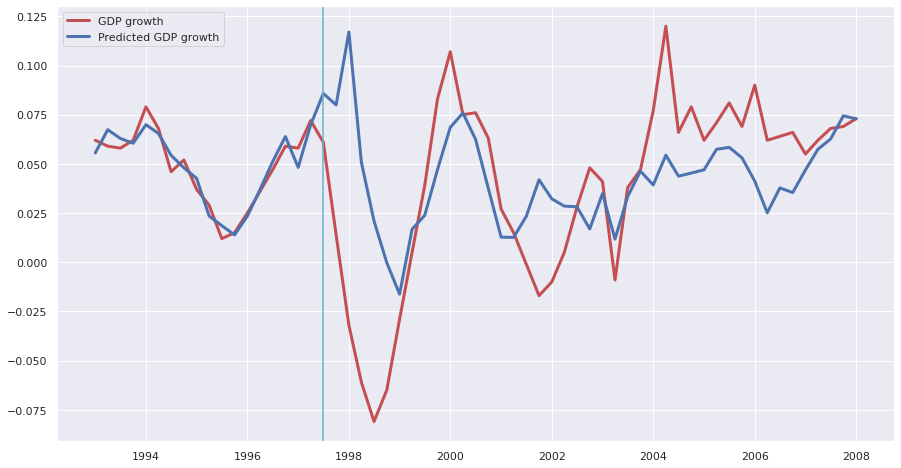

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)
data['year']=pd.to_datetime(data['time'])
plt.plot(data['year'],data['HongKong'],c='r', lw=3, label='GDP growth')
plt.plot(data['year'],data['predict_HongKong'],c='b', lw=3, label='Predicted GDP growth')
plt.legend(loc='upper left', frameon=True)
plt.axvline(pd.to_datetime('1997Q3'),c='c')
plt.show()

以上我们选取了一些国家进行回归，问题是我们并不能保证如此处理是预测效果最好的（没有过拟合、欠拟合）。接下来我们展示在线性回归的基础上进行L1正则化，即Lasso回归的做法：

In [30]:
data=pd.read_csv('csv/hcw.csv')
data['quarter']=pd.to_datetime(data['time'])
data=data.set_index('quarter')
data.index=data.index.to_period('Q')
pre1997=data[data.index<='1997Q2']
## 准备X,y
y=pre1997['HongKong']
X=pre1997.drop(['HongKong','China','time'],axis=1)
std_X=(X-X.mean())/X.std() # 一定要记得标准化X
std_X.describe()

,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,Japan,Korea,...,Norway,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,-1.480297e-16,-1.973730e-16,3.454027e-16,-6.167906e-18,0.000000,8.018277e-17,7.864080e-17,-2.158767e-16,5.088522e-17,-3.824102e-16,...,-1.480297e-16,3.700743e-17,4.934325e-17,-1.480297e-16,-3.392348e-17,1.048544e-16,7.771561e-16,1.850372e-16,1.727014e-16,-4.311366e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.855402e+00,-1.991950e+00,-1.269459e+00,-1.606998e+00,-1.777956,-1.720618e+00,-1.726021e+00,-1.893443e+00,-2.034777e+00,-1.928518e+00,...,-1.860787e+00,-2.352864e+00,-2.062670e+00,-1.606066e+00,-1.926089e+00,-2.504369e+00,-1.578262e+00,-1.652365e+00,-2.216105e+00,-2.470933e+00
25%,-4.605165e-01,-8.371103e-01,-6.916538e-01,-6.786943e-01,-0.579963,-3.008681e-01,-5.469972e-01,-6.775107e-01,-7.353816e-01,-8.302294e-01,...,-6.995495e-01,-3.258248e-01,-2.696595e-01,-8.950738e-01,-4.866339e-01,-5.128031e-01,-5.376221e-01,-8.606132e-01,-4.255681e-01,-5.422058e-01
50%,2.912820e-01,3.180241e-01,-3.274983e-01,1.516707e-01,0.016618,9.696599e-03,-7.079435e-02,2.097719e-01,2.978445e-01,7.503525e-02,...,-2.155832e-02,-1.076865e-01,3.730978e-01,1.720636e-01,-1.043469e-01,1.074332e-01,-2.913644e-01,7.794584e-02,4.098353e-01,1.711136e-01
75%,5.567160e-01,7.405953e-01,6.225495e-01,7.017792e-01,0.624786,7.063552e-01,8.586039e-01,7.976166e-01,7.879516e-01,3.921521e-01,...,6.624267e-01,7.207502e-01,6.118767e-01,8.093997e-01,8.207957e-01,5.434178e-01,3.758168e-01,6.113059e-01,6.717231e-01,6.484883e-01
max,1.531036e+00,1.241132e+00,1.991602e+00,1.770627e+00,1.432527,1.537361e+00,1.353062e+00,1.194978e+00,1.236600e+00,1.801378e+00,...,1.918698e+00,1.952238e+00,1.385831e+00,1.453857e+00,1.595478e+00,1.716803e+00,2.129883e+00,1.637198e+00,1.224307e+00,1.650306e+00


In [31]:
## 回归
lasso=linear_model.Lasso(alpha=0.0005, normalize=True)
lasso.fit(std_X,y)## 训练模型
lasso.coef_

array([ 0.00248975, -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.00781246, -0.0065794 ,
        0.003943  , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.00059474, -0.        ,  0.00267532])

选项中的alpha即我们上面提到的$\lambda$，而normalize选项设定为需要进行标准化。可以看到上面很多系数的取值都为0，达到了变量选择的目的。

然而上面的alpha是我们设定的，一个更好的办法是通过交叉验证选取合适的alpha。可以使用LassoCV来做：

In [32]:
lasso_cv=linear_model.LassoCV(eps=1e-5, normalize=True, cv=10, max_iter=1000) #10折交叉验证，最大迭代次数1000次
lasso_cv.fit(std_X,y)
print("选择的alpha=",lasso_cv.alpha_)
lasso_cv.coef_

选择的alpha= 0.0001834067673217111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.258303085241603e-07, tolerance: 6.231764705882354e-07
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.533620568678554e-07, tolerance: 6.231764705882354e-07
  positive)


array([ 3.73476562e-03, -0.00000000e+00,  7.59965554e-05,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -8.25522882e-03, -8.68332859e-03,  1.62022589e-03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.47103981e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.93586928e-03, -0.00000000e+00,  5.78449905e-03])

可以使用路径图来查看随着alpha的变动，系数的变动情况：

Text(0.5, 1.0, 'Coefficient Paths')

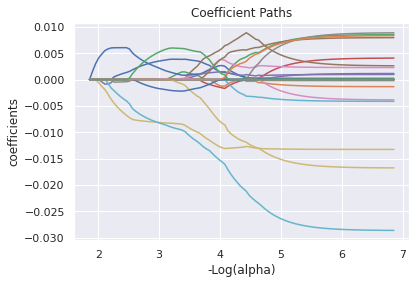

In [33]:
from sklearn.linear_model import lasso_path

alphas_lasso,coefs_lasso, _ = lasso_path(std_X, y, eps=1e-5)
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Coefficient Paths')

进一步做预测：

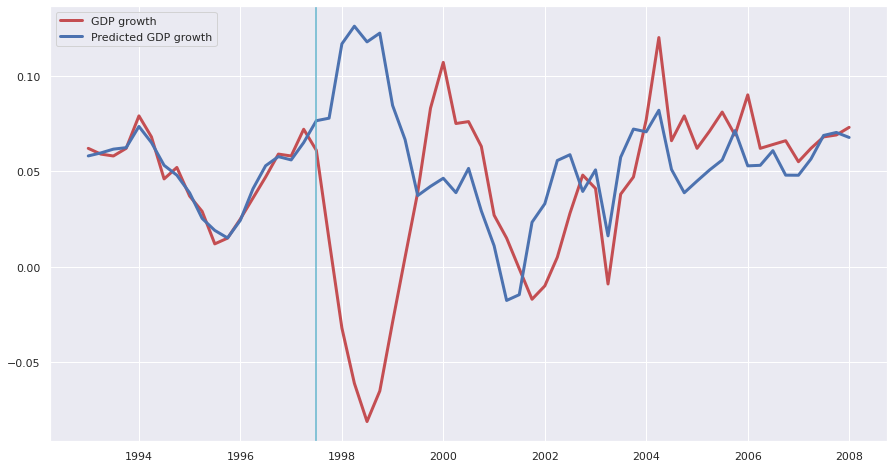

In [34]:
pred_set=data.drop(['HongKong','China','time'],axis=1)
pred_set=(pred_set-X.mean())/X.std() ## 因为Lasso命令之前的步骤中对X进行了标准化，所以需要对预测集也进行相同的标准化操作
predicted=lasso_cv.predict(pred_set)
data['predict_HongKong']=predicted
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)
data['year']=pd.to_datetime(data['time'])
plt.plot(data['year'],data['HongKong'],c='r', lw=3, label='GDP growth')
plt.plot(data['year'],data['predict_HongKong'],c='b', lw=3, label='Predicted GDP growth')
plt.legend(loc='upper left', frameon=True)
plt.axvline(pd.to_datetime('1997Q3'),c='c')
plt.show()

此外，还有一个比较常见的做法是单纯使用Lasso作为变量选择工具，使用Lasso选取变量后，继续使用OLS进行估计和预测，这杯成为『Post-estimation』，我们可以如此进行此操作：

In [35]:
selected_vars=X.columns[lasso_cv.coef_!=0]
print("选取的国家地区：\n",selected_vars)
data_ols=data.loc[:,selected_vars]
data_ols['HongKong']=data["HongKong"]
data_ols.head()

选取的国家地区：
 Index(['Australia', 'Canada', 'Japan', 'Korea', 'Mexico', 'UnitedStates',
       'Malaysia', 'Taiwan'],
      dtype='object')


,Australia,Canada,Japan,Korea,Mexico,UnitedStates,Malaysia,Taiwan,HongKong
quarter,,,,,,,,,
1993Q1,0.040489,0.010064,0.012683,0.058586,0.043746,0.022959,0.085938,0.064902,0.062
1993Q2,0.037857,0.021264,-0.005571,0.069521,0.012290,0.018936,0.131189,0.065123,0.059
1993Q3,0.022509,0.018919,-0.017558,0.081646,0.004462,0.017990,0.109666,0.067379,0.058
1993Q4,0.028747,0.025317,-0.010101,0.085533,0.015493,0.020683,0.075801,0.069164,0.062
1994Q1,0.033990,0.043567,-0.022503,0.085922,0.034448,0.029918,0.049147,0.069451,0.079


In [36]:
pre1997=data_ols[data.index<='1997Q2']
pre1997

,Australia,Canada,Japan,Korea,Mexico,UnitedStates,Malaysia,Taiwan,HongKong
quarter,,,,,,,,,
1993Q1,0.040489,0.010064,0.012683,0.058586,0.043746,0.022959,0.085938,0.064902,0.062
1993Q2,0.037857,0.021264,-0.005571,0.069521,0.012290,0.018936,0.131189,0.065123,0.059
1993Q3,0.022509,0.018919,-0.017558,0.081646,0.004462,0.017990,0.109666,0.067379,0.058
1993Q4,0.028747,0.025317,-0.010101,0.085533,0.015493,0.020683,0.075801,0.069164,0.062
1994Q1,0.033990,0.043567,-0.022503,0.085922,0.034448,0.029918,0.049147,0.069451,0.079
1994Q2,0.037919,0.050225,-0.005157,0.088415,0.063911,0.037840,0.061173,0.070135,0.068
1994Q3,0.052289,0.065122,0.014087,0.092796,0.064322,0.035534,0.101110,0.069298,0.046
1994Q4,0.031071,0.067331,0.005427,0.117461,0.066942,0.035411,0.134978,0.076049,0.052
1995Q1,0.008696,0.050921,0.003919,0.115388,0.043418,0.026520,0.130363,0.071104,0.037


In [37]:
y=pre1997['HongKong']
X=pre1997.drop("HongKong",axis=1)
reg=linear_model.LinearRegression().fit(X,y)## 训练模型
predicted=reg.predict(data_ols.drop("HongKong",axis=1))
data_ols['predict_HongKong']=predicted
data_ols

,Australia,Canada,Japan,Korea,Mexico,UnitedStates,Malaysia,Taiwan,HongKong,predict_HongKong
quarter,,,,,,,,,,
1993Q1,0.040489,0.010064,0.012683,0.058586,0.043746,0.022959,0.085938,0.064902,0.062,0.058078
1993Q2,0.037857,0.021264,-0.005571,0.069521,0.012290,0.018936,0.131189,0.065123,0.059,0.059922
1993Q3,0.022509,0.018919,-0.017558,0.081646,0.004462,0.017990,0.109666,0.067379,0.058,0.061578
1993Q4,0.028747,0.025317,-0.010101,0.085533,0.015493,0.020683,0.075801,0.069164,0.062,0.064064
1994Q1,0.033990,0.043567,-0.022503,0.085922,0.034448,0.029918,0.049147,0.069451,0.079,0.076534
...,...,...,...,...,...,...,...,...,...,...
2007Q1,0.058013,0.030712,0.023959,0.030068,0.038222,0.017708,0.039884,0.041019,0.055,0.051148
2007Q2,0.059519,0.039827,0.014193,0.037898,0.022226,0.018756,0.080276,0.051073,0.062,0.061173
2007Q3,0.056649,0.034742,0.012907,0.039380,0.031162,0.028225,0.093361,0.066369,0.068,0.073553


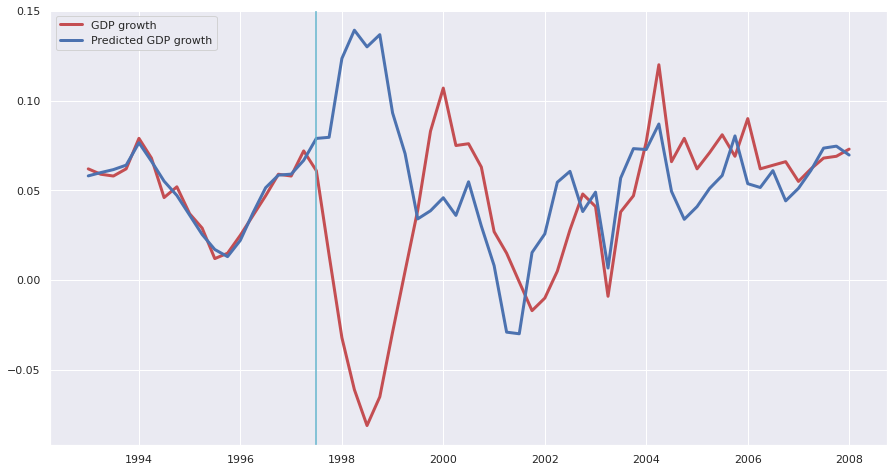

In [38]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)
data_ols['year']=pd.to_datetime(data['time'])
plt.plot(data_ols['year'],data_ols['HongKong'],c='r', lw=3, label='GDP growth')
plt.plot(data_ols['year'],data_ols['predict_HongKong'],c='b', lw=3, label='Predicted GDP growth')
plt.legend(loc='upper left', frameon=True)
plt.axvline(pd.to_datetime('1997Q3'),c='c')
plt.show()